# SparsePCA with MinMaxScaler

This code template is for Sparse Principal Component Analysis(SparsePCA) along with MinMax Scaler in python for dimensionality reduction technique and Data Rescaling. It is used to decompose a multivariate dataset into a set of successive orthogonal components that explain a maximum amount of the variance, keeping only the most significant singular vectors to project the data to a lower dimensional space.

### Required Packages

In [1]:
import warnings 
import itertools
import numpy as np 
import pandas as pd 
import seaborn as se 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.decomposition import SparsePCA
from numpy.linalg import eigh
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [2]:
#filepath
file_path= " "

List of features which are  required for model training .

In [35]:
#x_values
features=[]

Target feature for prediction.

In [36]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [37]:
df=pd.read_csv(file_path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [38]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [40]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

In [41]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

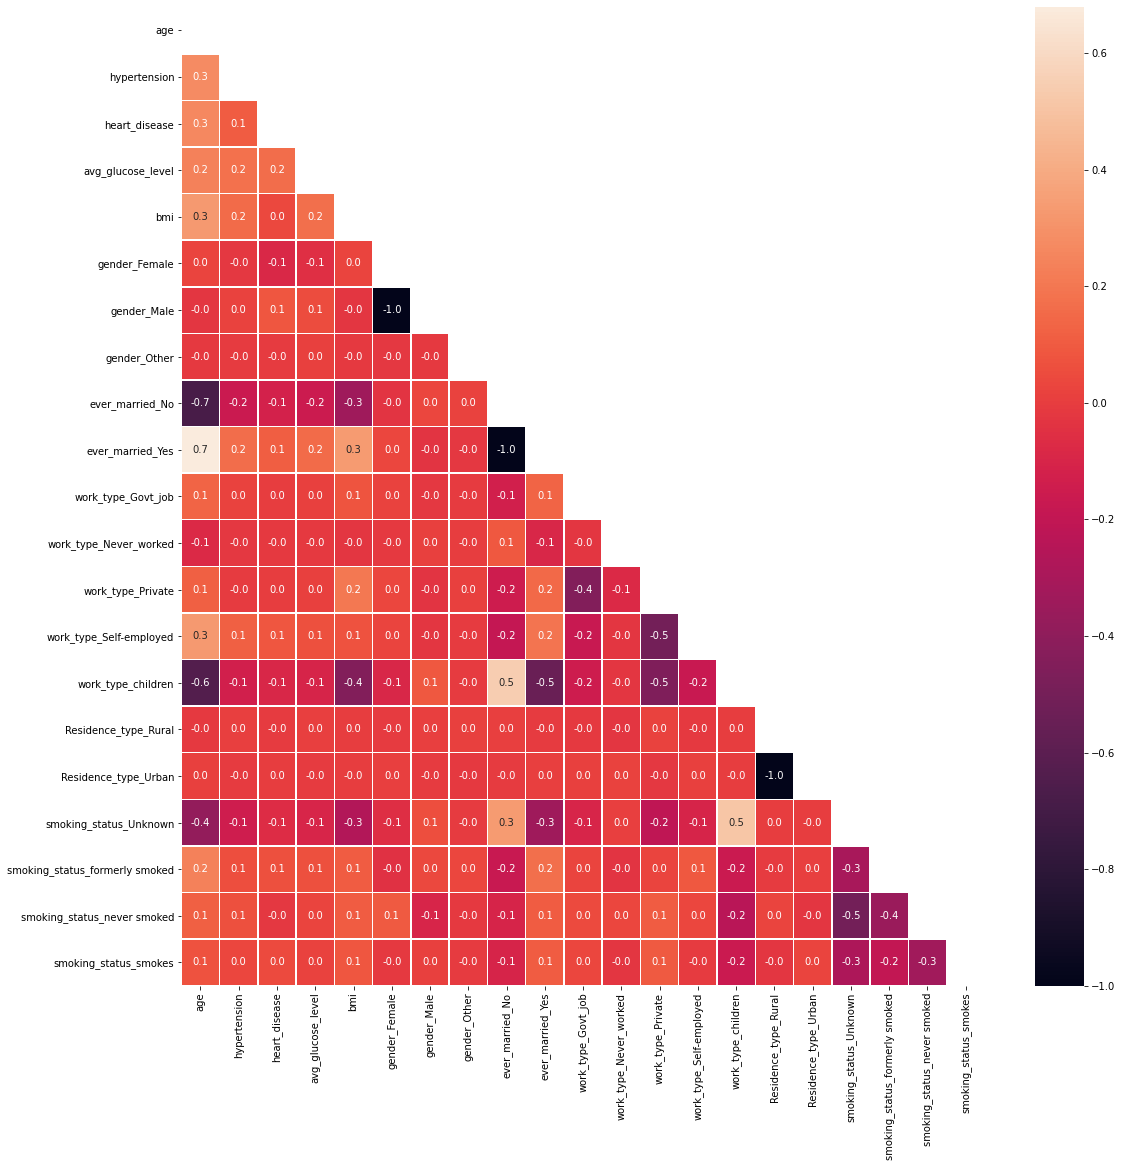

In [42]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Rescaling
MinMaxScaler subtracts the minimum value in the feature and then divides by the range, where range is the difference between the original maximum and original minimum.

In [43]:
X_Scaled=MinMaxScaler().fit_transform(X)
X=pd.DataFrame(X_Scaled,columns=X.columns)
X.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0.0,1.0,0.801265,0.301260,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.743652,0.0,0.0,0.679023,0.212981,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.975586,0.0,1.0,0.234512,0.254296,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Choosing the number of components

A vital part of using Sparse PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components.

This curve quantifies how much of the total, dimensional variance is contained within the first N components. 

### Explained Variance

Explained variance refers to the variance explained by each of the principal components (eigenvectors). It can be represented as a function of ratio of related eigenvalue and sum of eigenvalues of all eigenvectors.

The function below returns a list with the values of explained variance and also plots cumulative explained variance 

In [44]:
def explained_variance_plot(X):
    cov_matrix = np.cov(X, rowvar=False) #this function returns the co-variance matrix for the features 
    egnvalues, egnvectors = eigh(cov_matrix) #eigen decomposition is done here to fetch eigen-values and eigen-vectors
    total_egnvalues = sum(egnvalues)
    var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]
    plt.plot(np.cumsum(var_exp))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    return var_exp

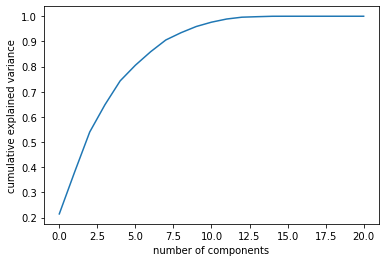

In [45]:
var_exp=explained_variance_plot(X)


#### Scree plot
The scree plot helps you to determine the optimal number of components. The eigenvalue of each component in the initial solution is plotted. Generally, you want to extract the components on the steep slope. The components on the shallow slope contribute little to the solution. 

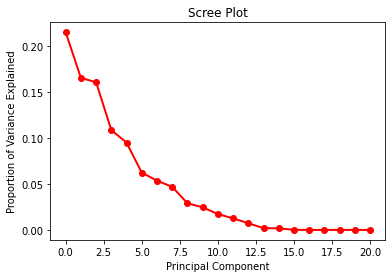

In [46]:
plt.plot(var_exp, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

# Model

Sparse PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. In scikit-learn, Sparse PCA finds the set of sparse components that can optimally reconstruct the data. The amount of sparseness is controllable by the coefficient of the L1 penalty, given by the parameter alpha.

#### Tunning parameters reference : 
[API](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html)

In [47]:
spca = SparsePCA(n_components=13)
spcaX = pd.DataFrame(data = spca.fit_transform(X))

#### Output Dataframe

In [48]:
finalDf = pd.concat([spcaX, Y], axis = 1)
finalDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,stroke
0,-0.481656,0.688871,-0.820535,-0.407053,0.433444,0.578704,-0.651621,0.000659,-0.096491,0.168409,0.936622,-0.560101,-0.287323,1
1,-0.481411,-0.711340,0.579677,0.813525,-0.726883,0.010965,-0.004527,0.606839,-0.096491,0.168920,-0.053477,-0.439069,-0.215141,1
2,-0.481526,-0.711340,-0.820535,-0.409456,-0.726883,0.010965,-0.004527,-0.000700,-0.096491,0.164333,0.936622,0.001041,-0.444464,1
3,-0.481586,0.688871,0.579677,-0.406030,0.430362,0.573919,0.748312,0.002913,-0.096491,0.167534,-0.053477,-0.297470,-0.069769,1
4,-0.481256,-0.711340,0.579677,0.810427,-0.726883,0.010965,-0.004527,0.604920,0.893608,0.163925,-0.053477,-0.310679,-0.432718,1


####  Creator:Ageer Harikrishna, Github: [Profile](https://github.com/ageerHarikrishna)